# Data Wrangling

In [177]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel("C:/Users/ACER/Downloads/Informasi Kurs Jisdor.xlsx")

df.head()

,NO,Tanggal,Kurs
0,1,8/12/2024 12:00:00 AM,15963
1,2,8/9/2024 12:00:00 AM,15914
2,3,8/8/2024 12:00:00 AM,15952
3,4,8/7/2024 12:00:00 AM,16100
4,5,8/6/2024 12:00:00 AM,16183


In [178]:
df

,NO,Tanggal,Kurs
0,1,8/12/2024 12:00:00 AM,15963
1,2,8/9/2024 12:00:00 AM,15914
2,3,8/8/2024 12:00:00 AM,15952
3,4,8/7/2024 12:00:00 AM,16100
4,5,8/6/2024 12:00:00 AM,16183
...,...,...,...
2080,2081,1/8/2016 12:00:00 AM,13874
2081,2082,1/7/2016 12:00:00 AM,13946
2082,2083,1/6/2016 12:00:00 AM,13863
2083,2084,1/5/2016 12:00:00 AM,13931


Dataset yang digunakan bersumber data Jisdor Bank Indonesia dengan frekuensi harian. JISDOR merupakan harga spot USD/IDR, yang disusun berdasarkan kurs transaksi USD/IDR terhadap rupiah antar bank di pasar valuta asing Indonesia, melalui Sistem Monitoring Transaksi Valuta Asing Terhadap Rupiah (SISMONTAVAR) di Bank Indonesia secara real time. JISDOR dimaksudkan untuk memberikan referensi harga pasar yang representatif untuk transaksi spot USD/IDR pasar valuta asing Indonesia. JISDOR mulai diterbitkan sejak 20 Mei 2013.

In [180]:
#Menghapus kolom yang tidak digunakan
df.drop("NO", axis=1, inplace=True)

In [181]:
#Cek data kosong
df.isnull().sum()

Tanggal    0
Kurs       0
dtype: int64

Berdasarkan hasil di atas dapat diambil kesimpulan bahwa dataset yang digunakan sudah lengkap dan tidak ada kolom yang berisi data null/kosong.

In [183]:
#Cek data duplikat
df.duplicated().sum()

0

Berdasarkan hasil di atas dapat diambil kesimpulan bahwa dataset yang digunakan sudah tidak mengandung baris yang sama atau duplikat.

In [185]:
print("Jumlah baris dan kolom pada dataset =", df.shape)

Jumlah baris dan kolom pada dataset = (2085, 2)


# Data Cleaning

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tanggal  2085 non-null   object
 1   Kurs     2085 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 32.7+ KB


In [188]:
#Mengubah tipe data pada kolom tanggal menjadi datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  2085 non-null   datetime64[ns]
 1   Kurs     2085 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 32.7 KB


In [189]:
df.head()

,Tanggal,Kurs
0,2024-08-12,15963
1,2024-08-09,15914
2,2024-08-08,15952
3,2024-08-07,16100
4,2024-08-06,16183


# Exploratory Data Analysis (EDA)

In [191]:
df['Tanggal'].min()

Timestamp('2016-01-04 00:00:00')

In [192]:
df['Tanggal'].max()

Timestamp('2024-08-12 00:00:00')

In [193]:
df.describe()

,Tanggal,Kurs
count,2085,2085.000000
mean,2020-04-18 14:22:37.122302208,14378.691607
min,2016-01-04 00:00:00,12926.000000
25%,2018-02-23 00:00:00,13695.000000
50%,2020-04-16 00:00:00,14300.000000
75%,2022-06-15 00:00:00,14913.000000
max,2024-08-12 00:00:00,16741.000000
std,NaN,834.553260


In [194]:
df['Kurs'].max()

16741

In [195]:
df['Kurs'].min()

12926

In [196]:
df[df['Kurs'] == df['Kurs'].max()]

,Tanggal,Kurs
1051,2020-04-02,16741


In [197]:
df[df['Kurs'] == df['Kurs'].min()]

,Tanggal,Kurs
1904,2016-09-28,12926


In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

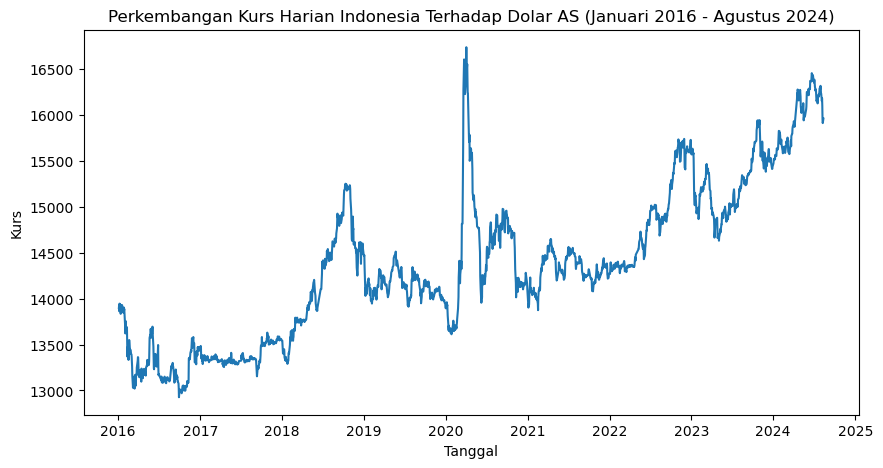

In [199]:
plt.figure(figsize=(10,5))
sns.lineplot(df, x='Tanggal', y='Kurs')
plt.title("Perkembangan Kurs Harian Indonesia Terhadap Dolar AS (Januari 2016 - Agustus 2024)")
plt.show()

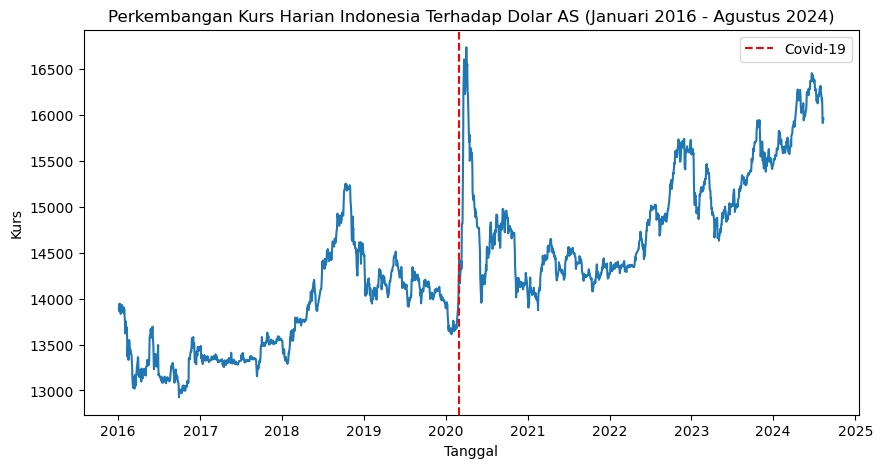

In [200]:
plt.figure(figsize=(10,5))
sns.lineplot(df, x='Tanggal', y='Kurs')
plt.axvline(x=pd.to_datetime('2020-03-02'), color='red', linestyle='--', linewidth=1.5, label='Covid-19')
plt.title("Perkembangan Kurs Harian Indonesia Terhadap Dolar AS (Januari 2016 - Agustus 2024)")
plt.legend()
plt.show()

Kurs Indonesia terhadap dolar AS sempat mengalami depresiasi (pelemahan) tepat setelah Covid-19 masuk ke Indonesia pada tanggal 2 Maret 2020. 

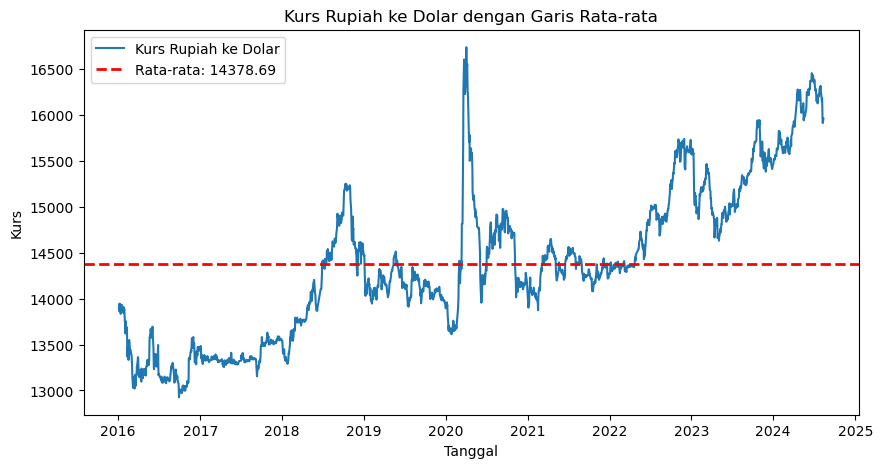

In [202]:
mean_kurs = df['Kurs'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x='Tanggal', y='Kurs', data=df, label='Kurs Rupiah ke Dolar')
plt.axhline(y=mean_kurs, color='red', linestyle='--', linewidth=2, label=f'Rata-rata: {mean_kurs:.2f}')
plt.title('Kurs Rupiah ke Dolar dengan Garis Rata-rata')
plt.xlabel('Tanggal')
plt.ylabel('Kurs')

plt.legend()
plt.show()

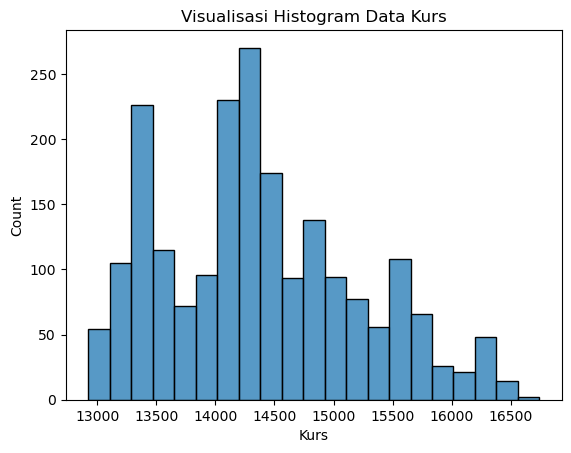

In [203]:
sns.histplot(df['Kurs'])
plt.title("Visualisasi Histogram Data Kurs")
plt.show()

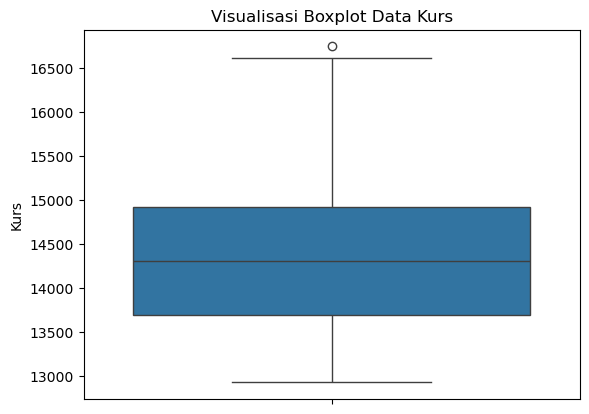

In [204]:
sns.boxplot(df['Kurs'])
plt.title("Visualisasi Boxplot Data Kurs")
plt.show()

In [205]:
df2 = df.copy()

df2['Bulan'] = df2['Tanggal'].dt.month
df2['Tahun'] = df2['Tanggal'].dt.year

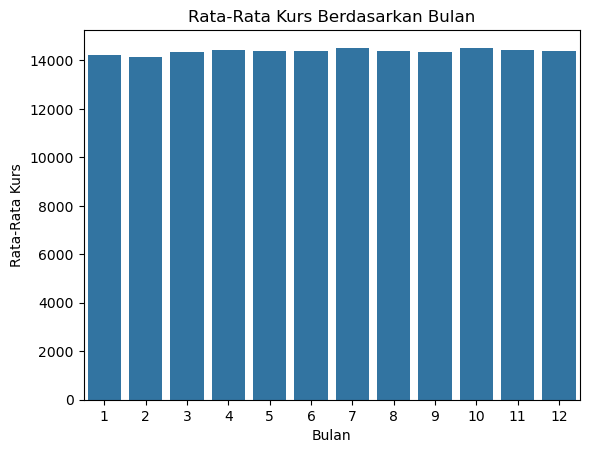

In [206]:
data = df2.groupby("Bulan")['Kurs'].mean().reset_index(name='Rata-Rata Kurs')

sns.barplot(data, x='Bulan', y='Rata-Rata Kurs')
plt.title("Rata-Rata Kurs Berdasarkan Bulan")
plt.show()

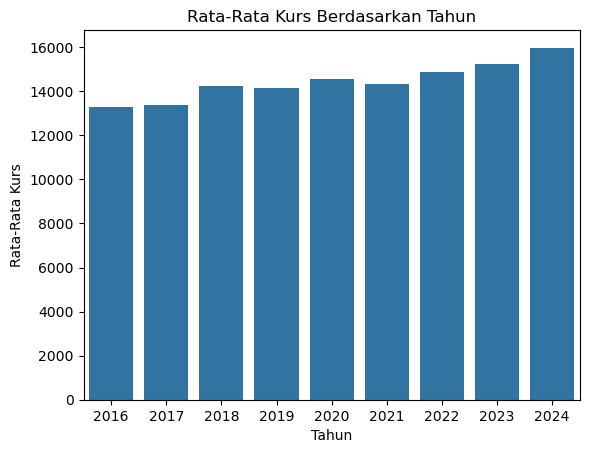

In [207]:
data = df2.groupby("Tahun")['Kurs'].mean().reset_index(name='Rata-Rata Kurs')

sns.barplot(data, x='Tahun', y='Rata-Rata Kurs')
plt.title("Rata-Rata Kurs Berdasarkan Tahun")
plt.show()

# Train Test Split

In [276]:
import numpy as np

#Menetapkan tanggal pembagian
tanggal_split = '2022-10-22'

#Menetapkan data sebelum atau sampai dengan tanggal 2022-10-22 sebagai data training
data_train = df[df['Tanggal'] <= tanggal_split].copy()

#Menetapkan data setelah tanggal 2022-10-22 sebagai data testing
data_test = df[df['Tanggal'] > tanggal_split].copy()

In [278]:
#Menggabungkan data training dan testing untuk visualisasi
combined_data = pd.concat([data_train, data_test])
combined_data['Split Data'] = np.where(combined_data['Tanggal'] <= tanggal_split, 'training set', 'testing set')
combined_data.head()

,Tanggal,Kurs,Split Data
430,2022-10-21,15610,training set
431,2022-10-20,15579,training set
432,2022-10-19,15491,training set
433,2022-10-18,15469,training set
434,2022-10-17,15480,training set


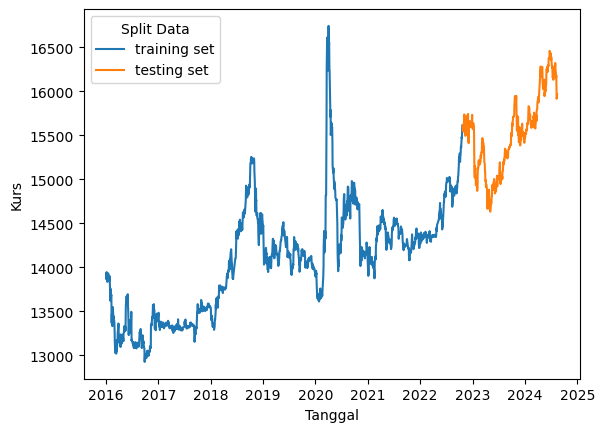

In [282]:
#Memvisualisasikan data training dan data testing
sns.lineplot(combined_data, x='Tanggal', y='Kurs', hue='Split Data')
plt.show()

# Prophet Modelling

In [294]:
#Mengubah kolom sesuai standar model prophet yaitu mengubah tanggal menjadi ds dan kurs menjadi y
data_train.rename(columns={'Tanggal':'ds', 'Kurs':'y'}, inplace=True)
data_train.head()

,ds,y
430,2022-10-21,15610
431,2022-10-20,15579
432,2022-10-19,15491
433,2022-10-18,15469
434,2022-10-17,15480


In [304]:
#Menimport library yang dibutuhkan
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [306]:
#Menginisiasi model prophet
model = Prophet().fit(data_train)

19:37:14 - cmdstanpy - INFO - Chain [1] start processing
19:37:15 - cmdstanpy - INFO - Chain [1] done processing


In [308]:
# Memprediksi hasil forecasting
hasil_forecast = model.predict(df=data_test.reset_index() \
                                   .rename(columns={'Tanggal':'ds'}))

In [310]:
#Detail hasil forecasting
hasil_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-10-24,14803.476644,14667.989062,15295.655983,14803.476644,14803.476644,169.619731,169.619731,169.619731,53.773123,53.773123,53.773123,115.846608,115.846608,115.846608,0.0,0.0,0.0,14973.096376
1,2022-10-25,14804.834879,14656.622629,15264.147210,14804.834879,14804.834879,157.449427,157.449427,157.449427,52.823654,52.823654,52.823654,104.625773,104.625773,104.625773,0.0,0.0,0.0,14962.284306
2,2022-10-26,14806.193114,14649.617499,15252.679564,14806.193114,14806.193114,149.120092,149.120092,149.120092,55.903586,55.903586,55.903586,93.216506,93.216506,93.216506,0.0,0.0,0.0,14955.313206
3,2022-10-27,14807.551349,14643.029103,15248.029658,14807.551349,14807.551349,142.203630,142.203630,142.203630,60.478369,60.478369,60.478369,81.725260,81.725260,81.725260,0.0,0.0,0.0,14949.754979
4,2022-10-28,14808.909585,14630.701268,15262.302419,14808.909585,14808.909585,132.896222,132.896222,132.896222,62.640119,62.640119,62.640119,70.256103,70.256103,70.256103,0.0,0.0,0.0,14941.805807


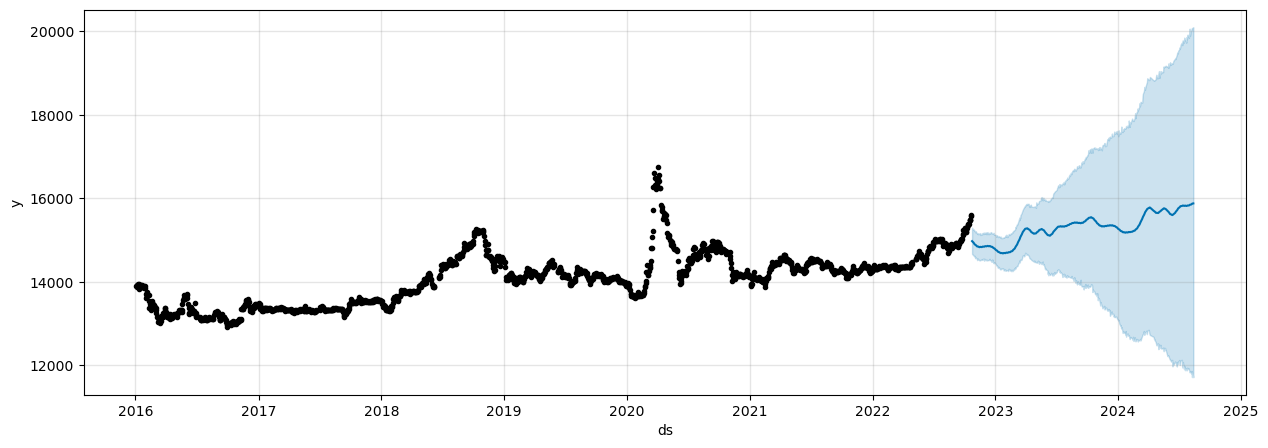

In [312]:
# Plot hasil forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(hasil_forecast,
                 ax=ax)
plt.show()

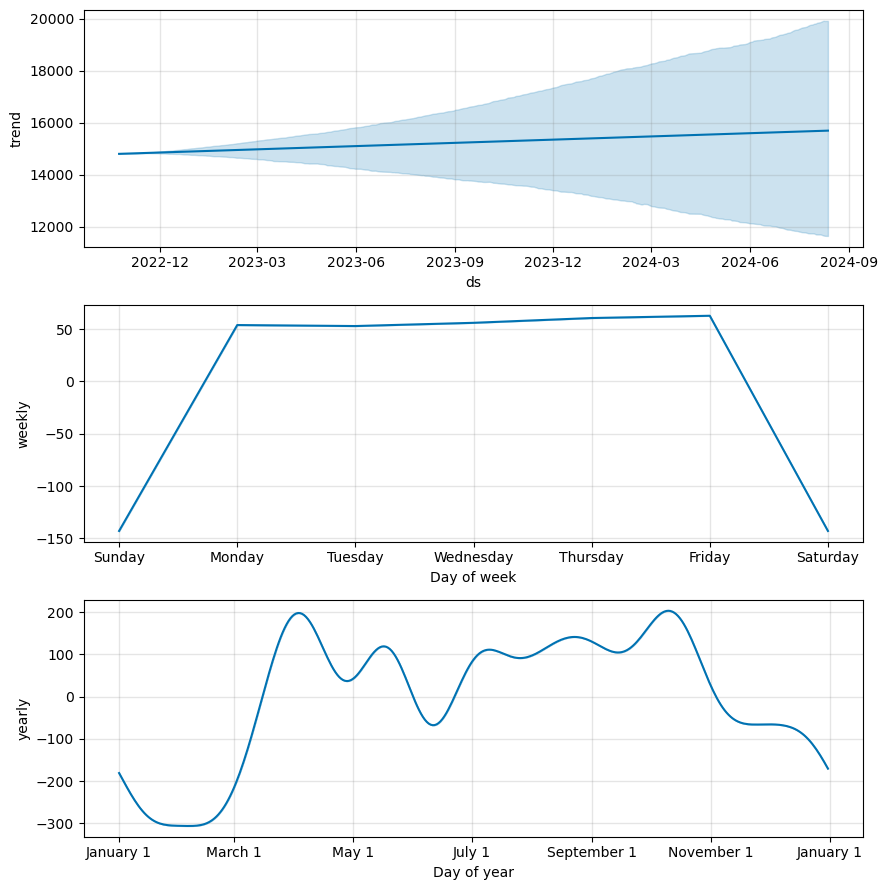

In [314]:
# Memvisualisasikan komponen hasil forecast
fig = model.plot_components(hasil_forecast)

# Perbandingan Aktual vs Prediksi

In [342]:
aktual_vs_prediksi = pd.merge(data_test, hasil_forecast[['ds', 'yhat']], how='inner', right_on='ds', left_on='Tanggal').drop("ds", axis=1).rename(columns={'yhat':'Prediksi', 'Kurs':'Aktual'})

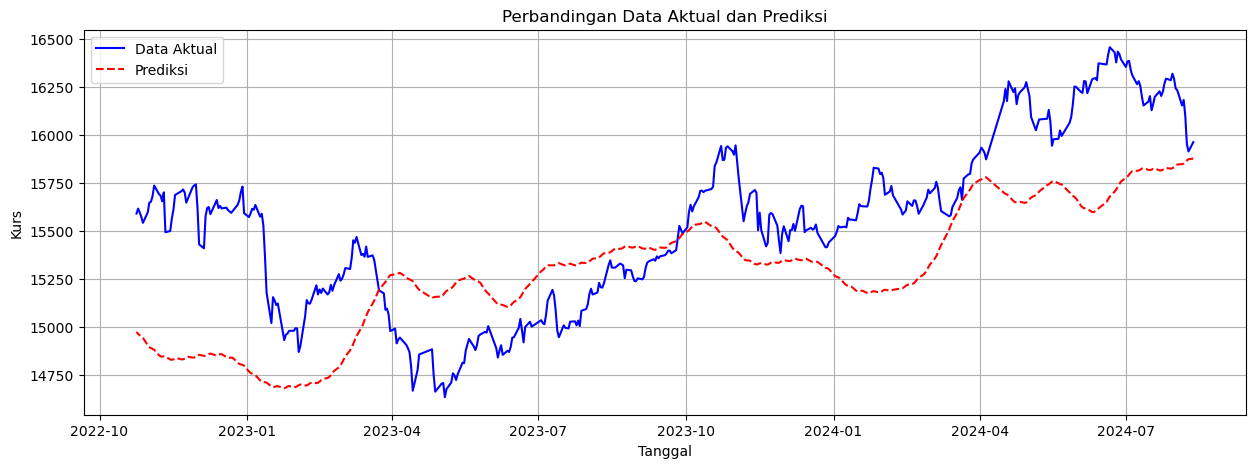

In [340]:
plt.figure(figsize=(15, 5))
plt.plot(aktual_vs_prediksi['Tanggal'], aktual_vs_prediksi['Aktual'], label='Data Aktual', color='blue')
plt.plot(aktual_vs_prediksi['Tanggal'], aktual_vs_prediksi['Prediksi'], label='Prediksi', color='red', linestyle='--')
plt.title('Perbandingan Data Aktual dan Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Kurs')
plt.legend()
plt.grid(True)
plt.show()

# Mengevaluasi Model

In [348]:
mse = mean_squared_error(y_true=data_test['Kurs'],
                   y_pred=hasil_forecast['yhat'])

print("Mean Squared Error =", mse)

Mean Squared Error = 513658.4597793233


In [352]:
mae = mean_absolute_error(y_true=data_test['Kurs'],
                   y_pred=hasil_forecast['yhat'])

print("Mean Absolute Error =", mae)

Mean Absolute Error = 546.2166539886415
